# Análisis exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as snf
import seaborn as sns
import geopandas as gpd

In [2]:
df_censo = pd.read_csv("Censo.csv")
df_calidad_aire = pd.read_csv("Calidad_Aire.csv")
df_hospi = pd.read_csv("df_hospi.csv", encoding="iso-8859-1")

In [3]:
df_calidad_aire.dtypes

Año                int64
Emisión           object
Emisión_ID         int64
Provincia         object
Provincia_ID       int64
Emisión Anual    float64
dtype: object

In [4]:
df_calidad_aire['Emisión'].unique()

array(['As', 'BaP', 'Cd', 'Ni', 'PM10', 'PM25', 'Pb'], dtype=object)

In [5]:
df_censo.head(3)

Año Provincia  Provincia_ID     Sexo  Habitantes
0  2021  Albacete             2  Hombres      193487
1  2020  Albacete             2  Hombres      193913
2  2019  Albacete             2  Hombres      193806

<Axes: xlabel='Diagnóstico_ID', ylabel='Hospitalizaciones'>

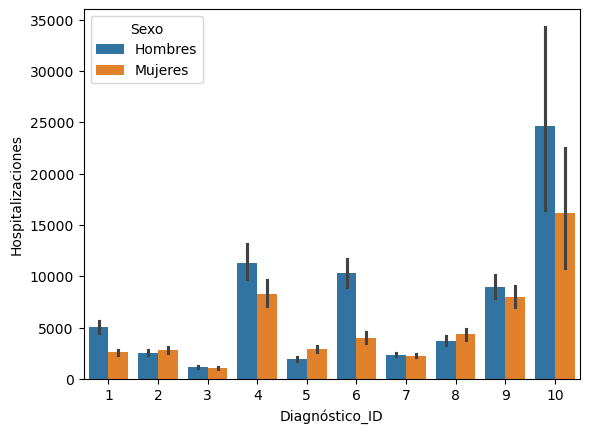

In [6]:
sns.barplot(data = df_hospi, x = "Diagnóstico_ID", y = "Hospitalizaciones",
             hue = "Sexo")

In [7]:
df_calidad_aire.head(3)

Año Emisión  Emisión_ID Provincia  Provincia_ID  Emisión Anual
0  2012      As           1     Álava             1         0.3552
1  2012      As           1  Alicante             3         0.2681
2  2012      As           1   Almería             4         0.5523

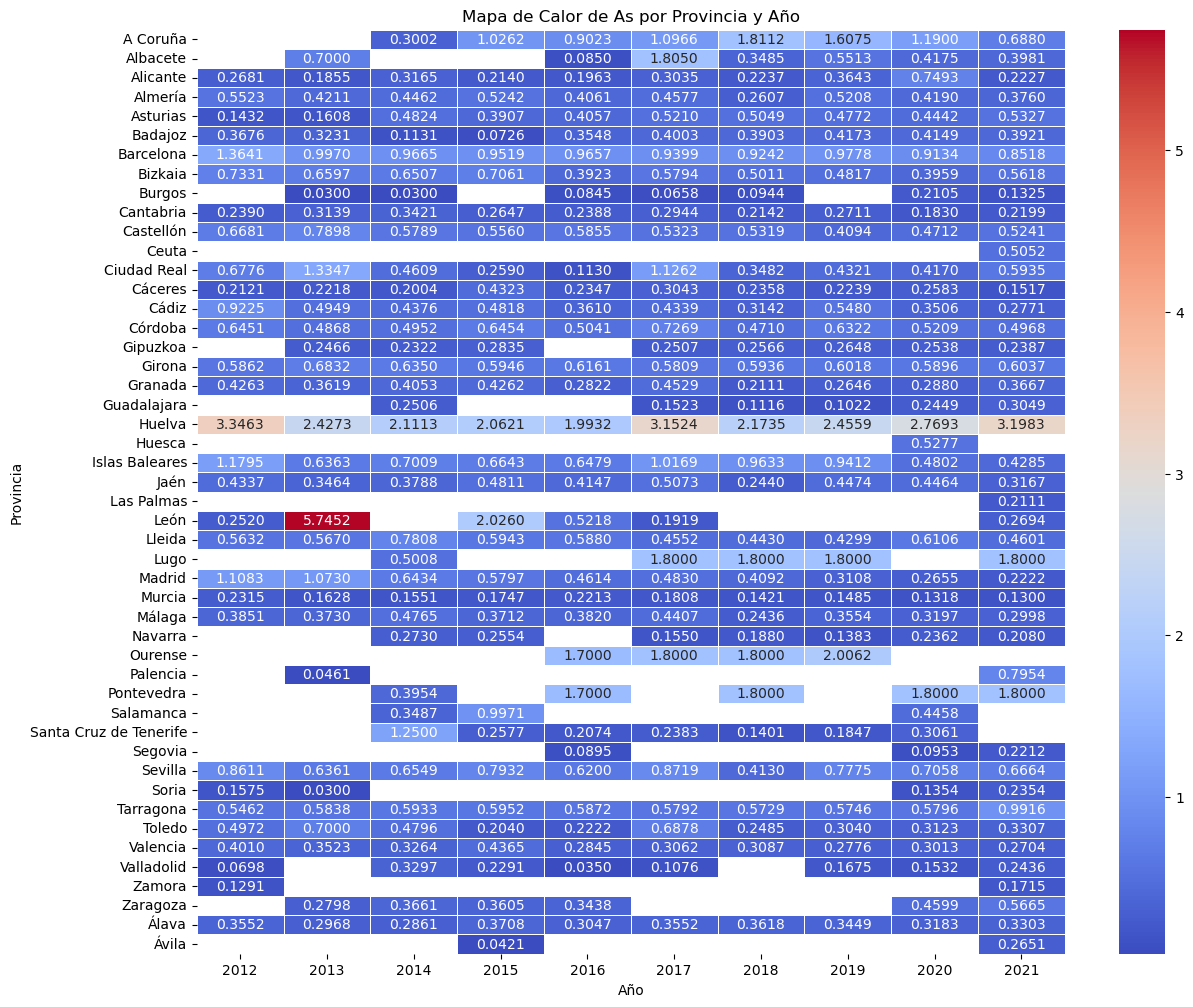

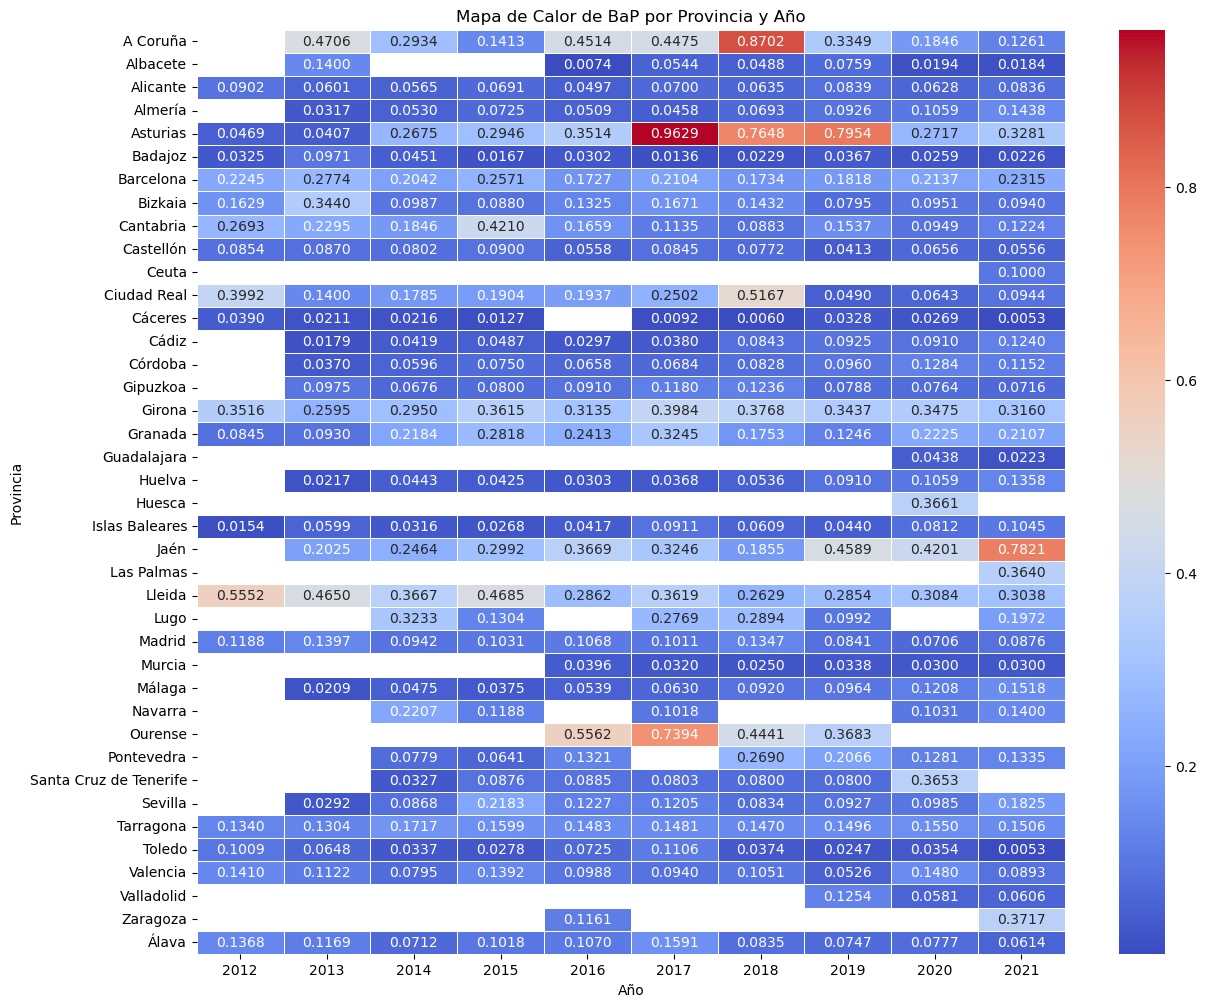

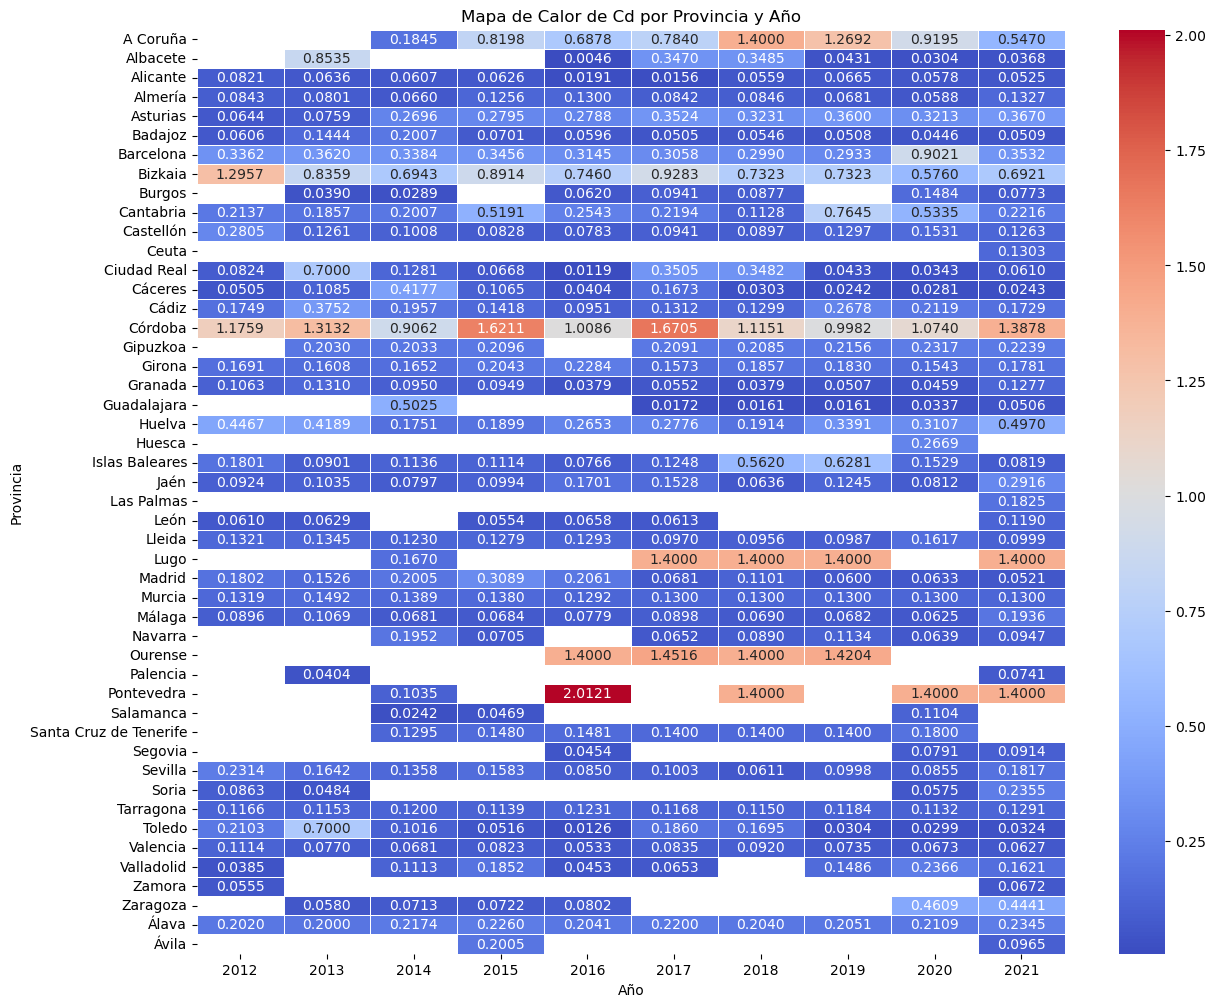

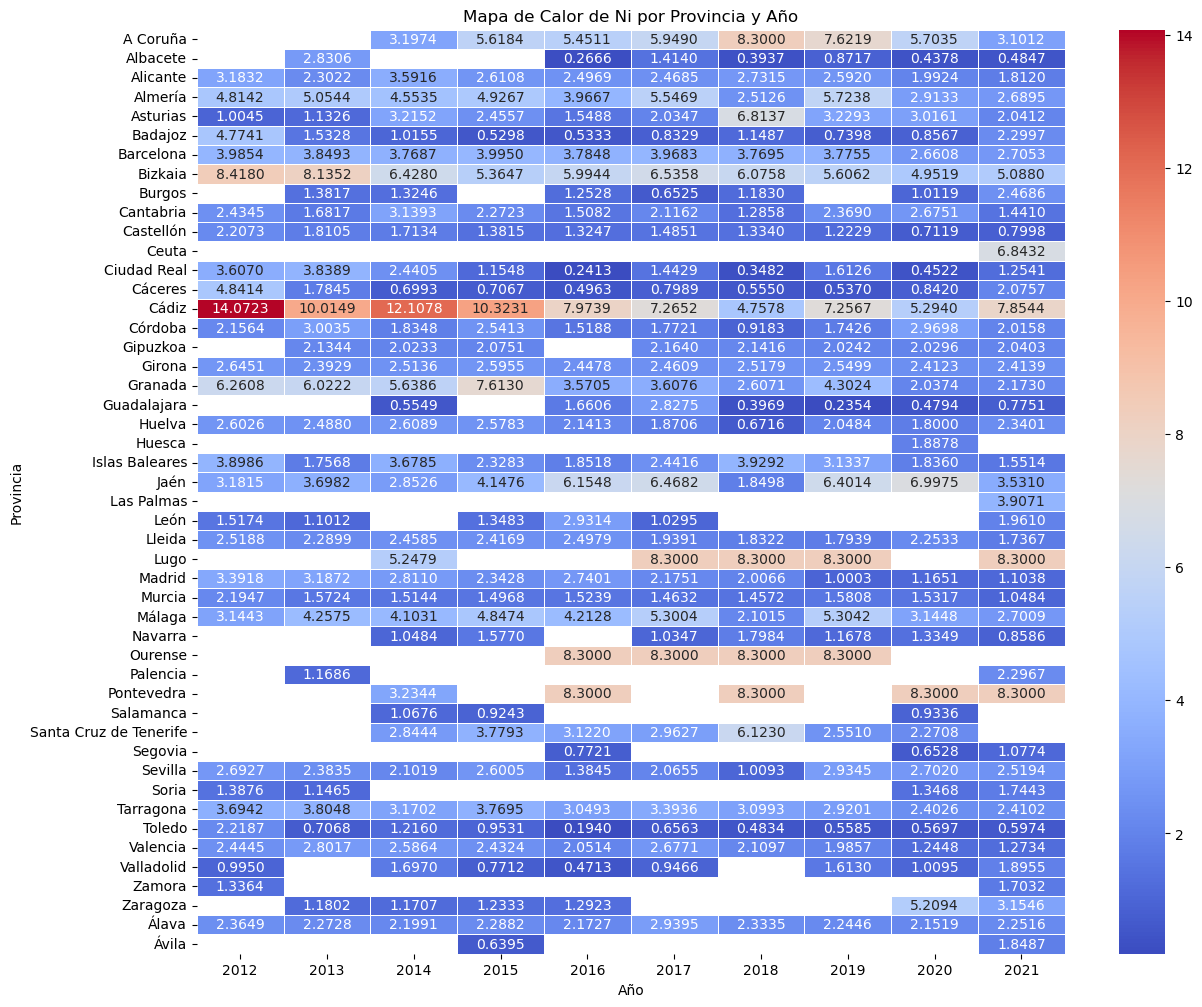

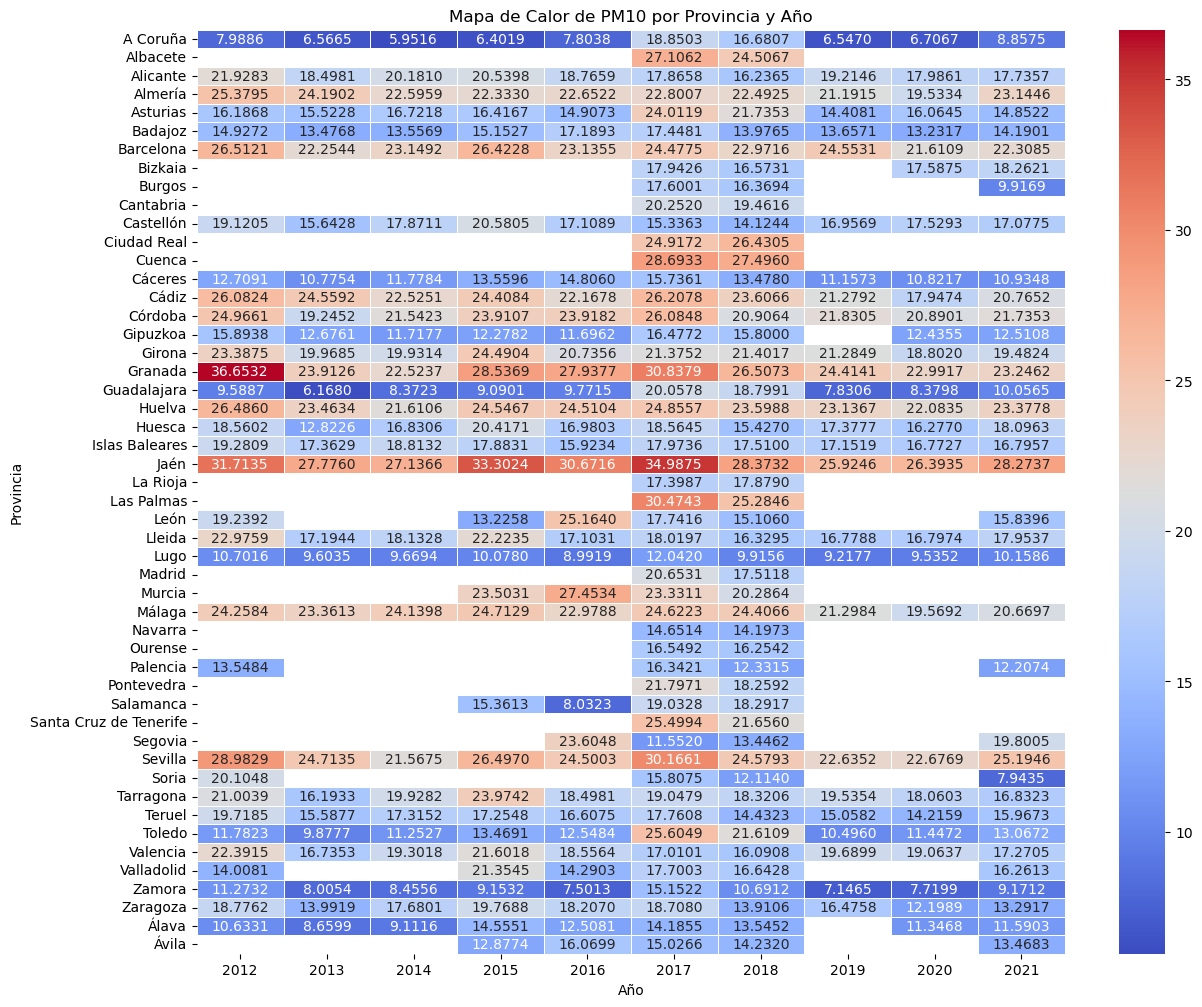

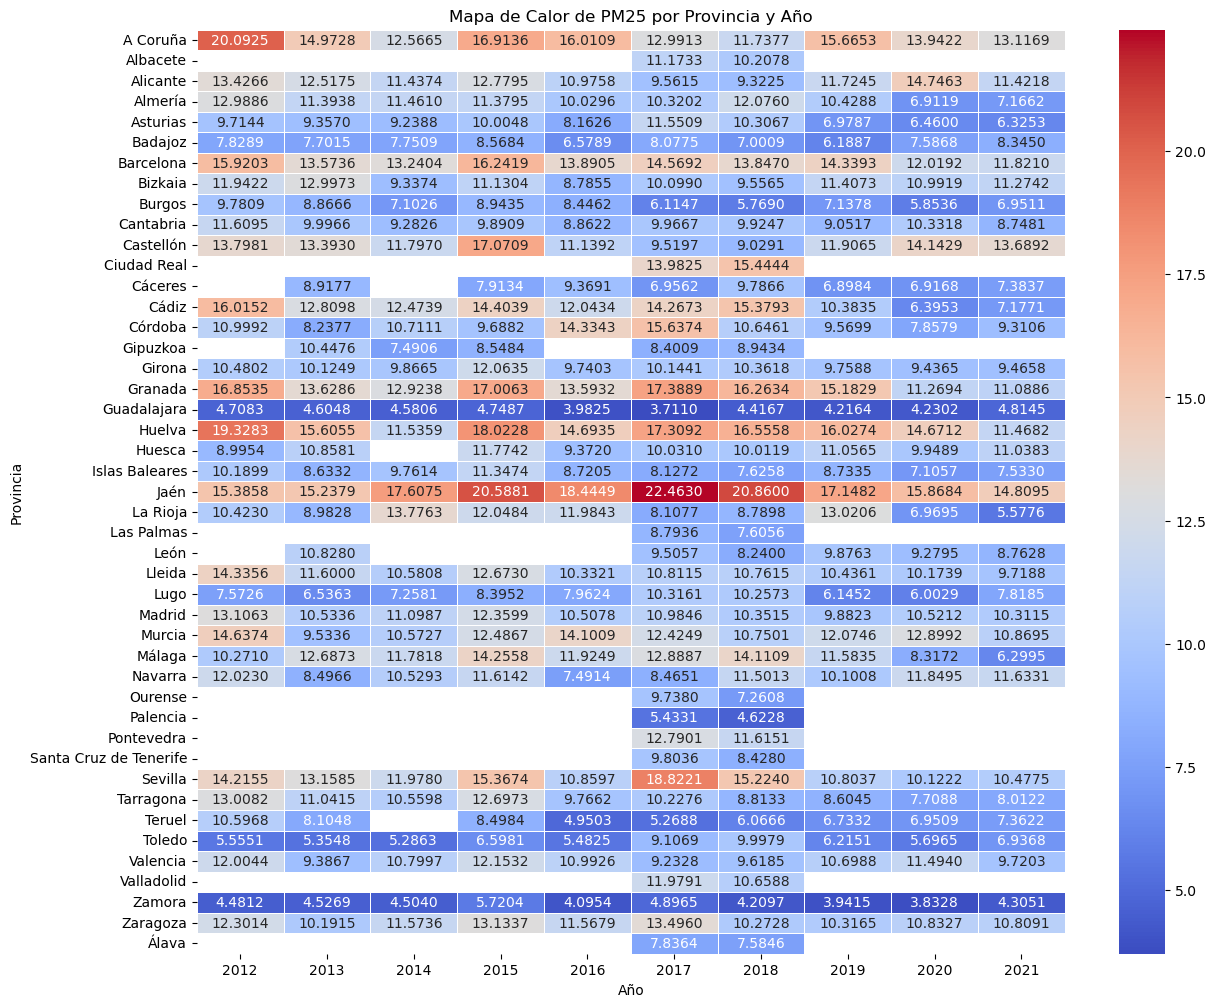

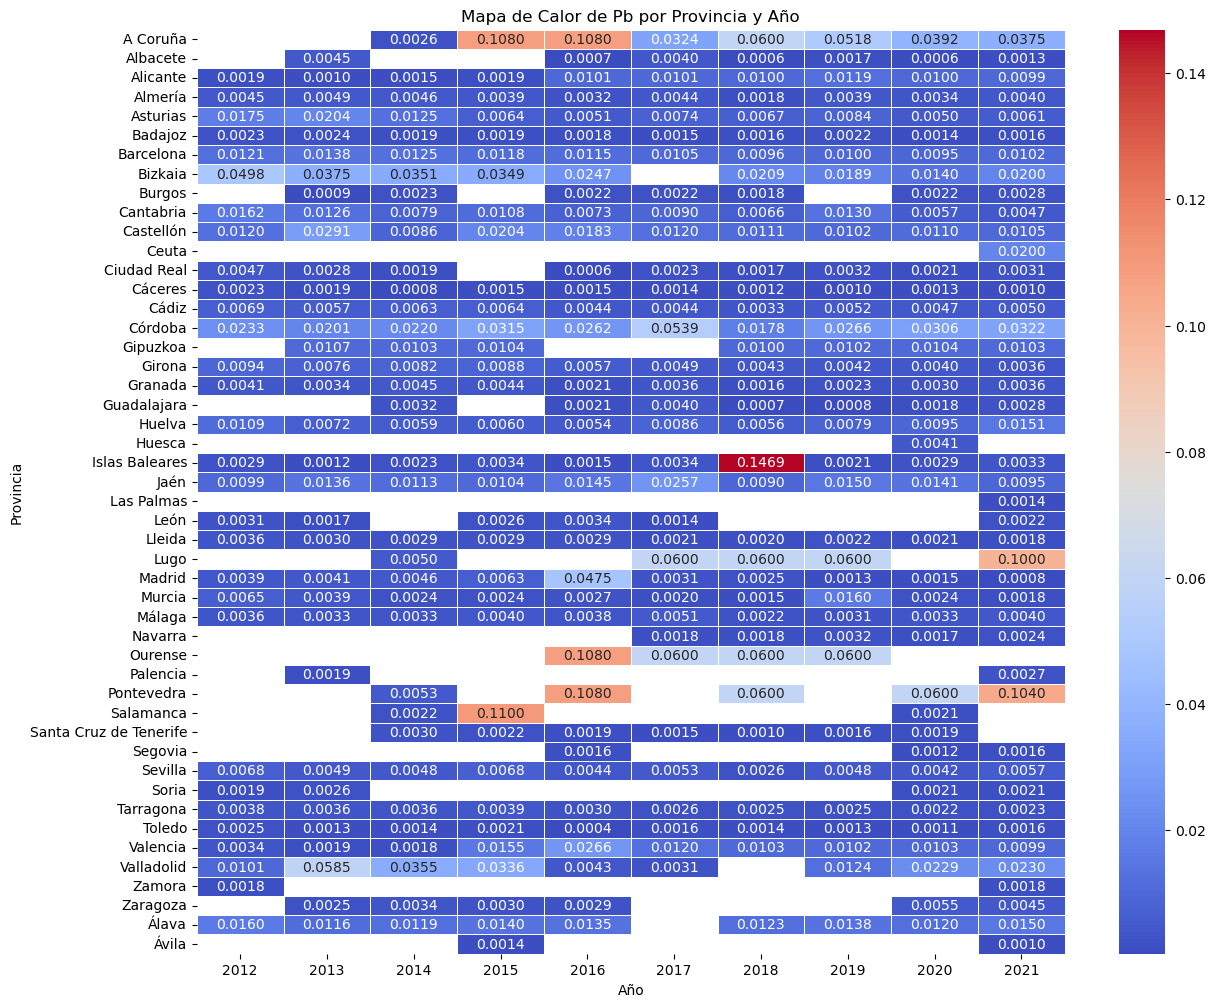

In [8]:

emisiones = df_calidad_aire['Emisión'].unique()
for emision in emisiones:
    plt.figure(figsize=(14, 12))
    try:
        # Filtrar los datos para la emisión actual
        datos_emision = df_calidad_aire[df_calidad_aire['Emisión'] == emision]
        # ordenar valores 
        datos_emision = datos_emision.sort_values(by=['Provincia', 'Año'])

     # Crear una tabla pivote para el mapa de calor
        heatmap_data = datos_emision.pivot_table(index='Provincia', columns='Año', values='Emisión Anual', aggfunc='mean')

        # Crear el mapa de calor
        sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".4f", linewidths=.5)
        plt.title(f'Mapa de Calor de {emision} por Provincia y Año')
        plt.xlabel('Año')
        plt.ylabel('Provincia')
        plt.show()

    except Exception as e:
        print(f"Error al generar el mapa de calor para {emision}: {e}")

In [51]:
df_calidad_aire['Provincia'].unique()

array(['Álava', 'Alicante', 'Almería', 'Badajoz', 'Islas Baleares',
       'Barcelona', 'Cáceres', 'Cádiz', 'Castellón', 'Ciudad Real',
       'Córdoba', 'Girona', 'Granada', 'Huelva', 'Jaén', 'León', 'Lleida',
       'Madrid', 'Málaga', 'Murcia', 'Asturias', 'Cantabria', 'Sevilla',
       'Soria', 'Tarragona', 'Toledo', 'Valencia', 'Valladolid',
       'Bizkaia', 'Zamora', 'A Coruña', 'Guadalajara', 'Gipuzkoa',
       'Huesca', 'Lugo', 'Palencia', 'Teruel', 'Zaragoza', 'Burgos',
       'La Rioja', 'Navarra', 'Albacete', 'Pontevedra', 'Salamanca',
       'Islas Canarias', 'Ávila', 'Ourense', 'Segovia', 'Cuenca', 'Ceuta'],
      dtype=object)

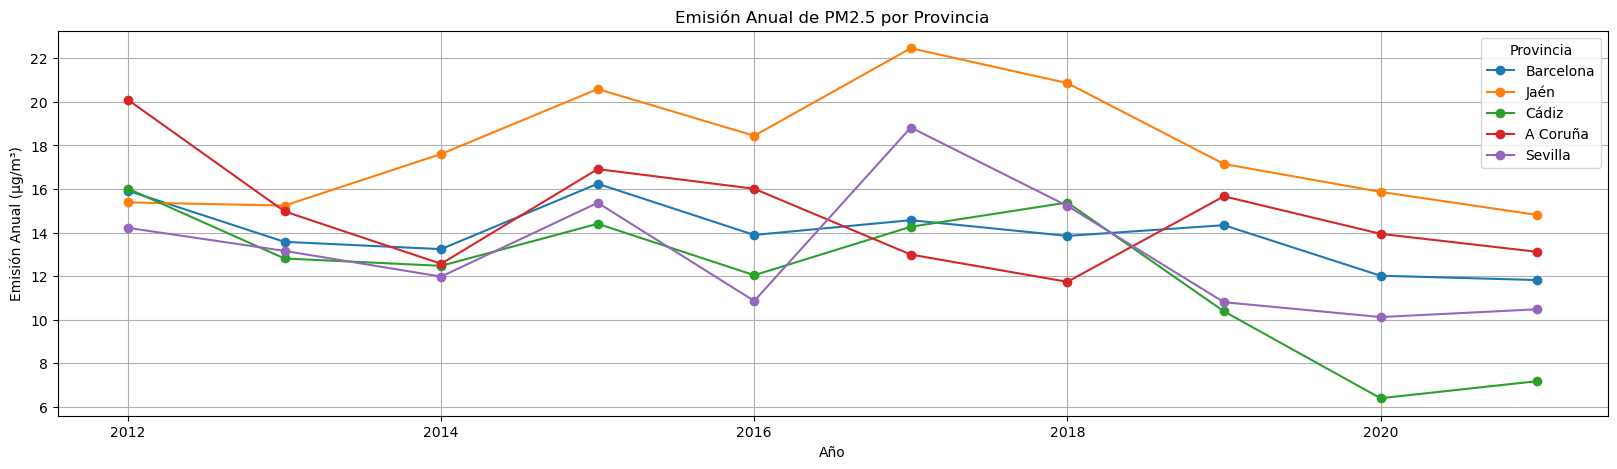

In [56]:
# Filtrar los datos para 'PM2.5' y las provincias específicas
provincias_interes_PM25 = ['Barcelona','Jaén','Cádiz','A Coruña','Sevilla']
datos_pm25 = df_calidad_aire[(df_calidad_aire['Emisión'] == 'PM25') & (df_calidad_aire['Provincia'].isin(provincias_interes_PM25))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_PM25:
    datos_provincia = datos_pm25[datos_pm25['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f'{provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de PM2.5 por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Altas concentraci0ones de PM 2.5 Particulas finas de diametro en Barcelona, Jaen,Cadiz,Coruña y Sevilla 

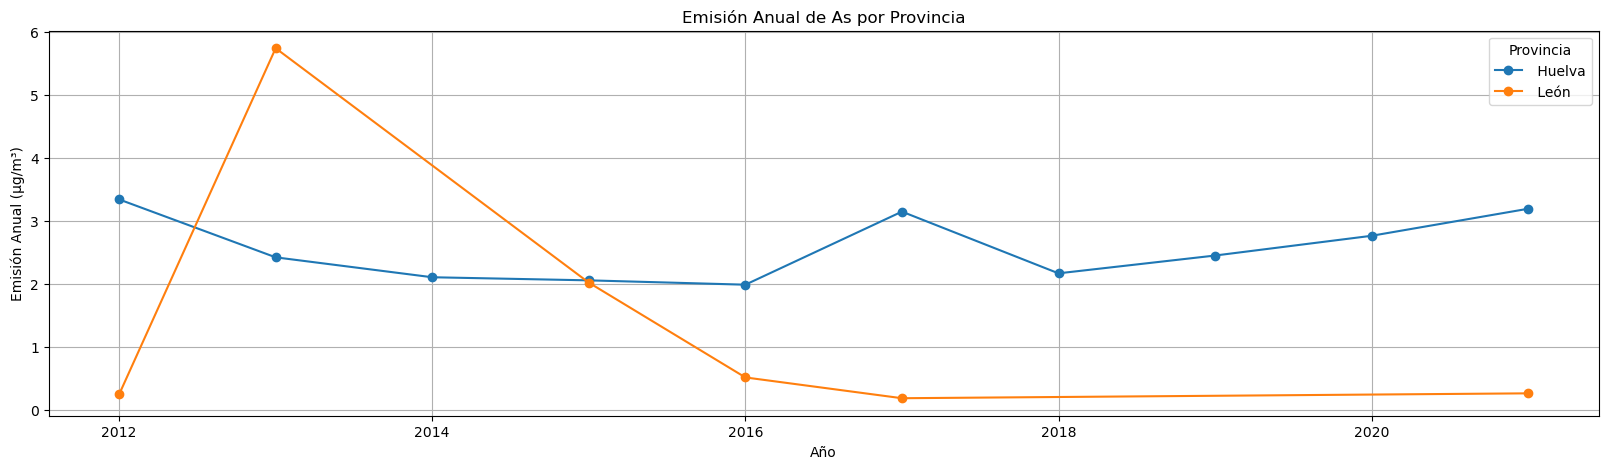

In [57]:
# Filtrar los datos para 'AS' y las provincias específicas
provincias_interes_As = ['Huelva','León']
datos_as = df_calidad_aire[(df_calidad_aire['Emisión'] == 'As') & (df_calidad_aire['Provincia'].isin(provincias_interes_As))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_As:
    datos_provincia = datos_as[datos_as['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f' {provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de As por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Altas oncentraciones de As Arsenico en Huelva y Leon

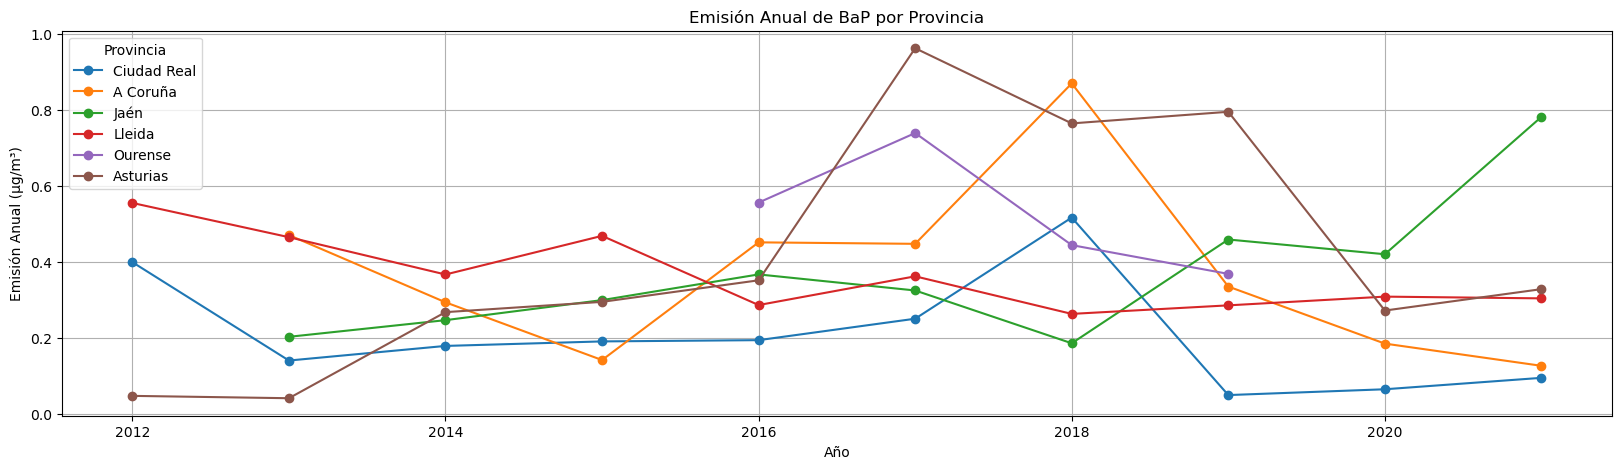

In [59]:
# Filtrar los datos para 'BaP' y las provincias específicas
provincias_interes_Bap = ['Ciudad Real' , 'A Coruña', 'Jaén' , 'Lleida' ,'Ourense' ,'Asturias']
datos_BaP = df_calidad_aire[(df_calidad_aire['Emisión'] == 'BaP') & (df_calidad_aire['Provincia'].isin(provincias_interes_Bap))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_Bap:
    datos_provincia = datos_BaP[datos_BaP['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f'{provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de BaP por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Altas concetraciones de BaP Benzo Pireno en Ciudad Real , Coruña, Jaen , Lleida ,Ourense ,Asturias

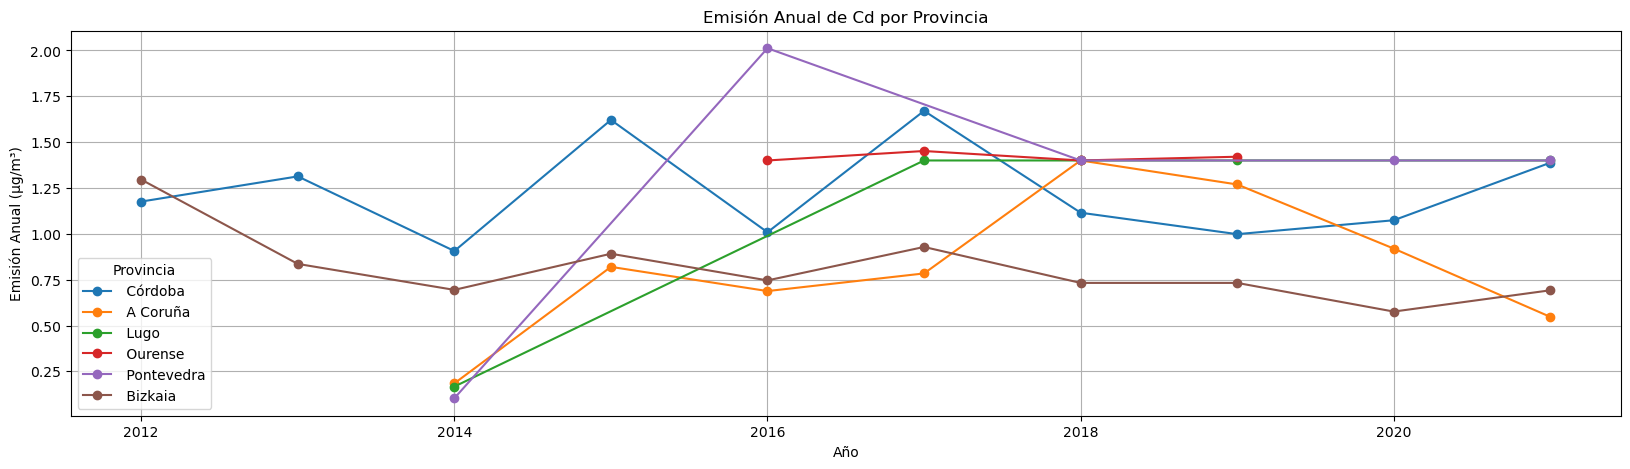

In [60]:
# Filtrar los datos para 'Cd' y las provincias específicas
provincias_interes_Cd = ['Córdoba' , 'A Coruña', 'Lugo' , 'Ourense', 'Pontevedra' , 'Bizkaia']
datos_Cd = df_calidad_aire[(df_calidad_aire['Emisión'] == 'Cd') & (df_calidad_aire['Provincia'].isin(provincias_interes_Cd))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_Cd:
    datos_provincia = datos_Cd[datos_Cd['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f' {provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de Cd por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Altas concetraciones de Cadmio en Cordoba , Coruña, Lugo , Ourense, Pontevedra ,  Bizkaia

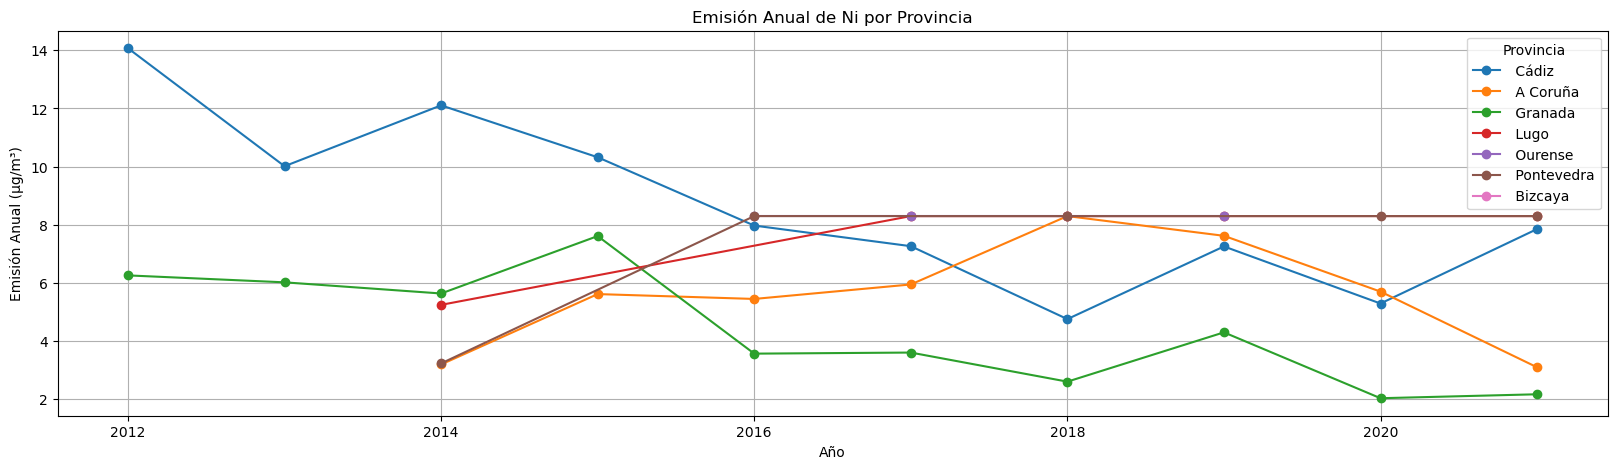

In [62]:
# Filtrar los datos para 'Ni' y las provincias específicas
provincias_interes_Ni = ['Cádiz','A Coruña','Granada', 'Lugo', 'Ourense' , 'Pontevedra','Bizcaya']
datos_Ni = df_calidad_aire[(df_calidad_aire['Emisión'] == 'Ni') & (df_calidad_aire['Provincia'].isin(provincias_interes_Ni))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_Ni:
    datos_provincia = datos_Ni[datos_Ni['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f' {provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de Ni por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Alta concentracion de Niquel en Cadiz,Coruña,Granada, Lugo, Ourense , Pontevedra,Bizcaia

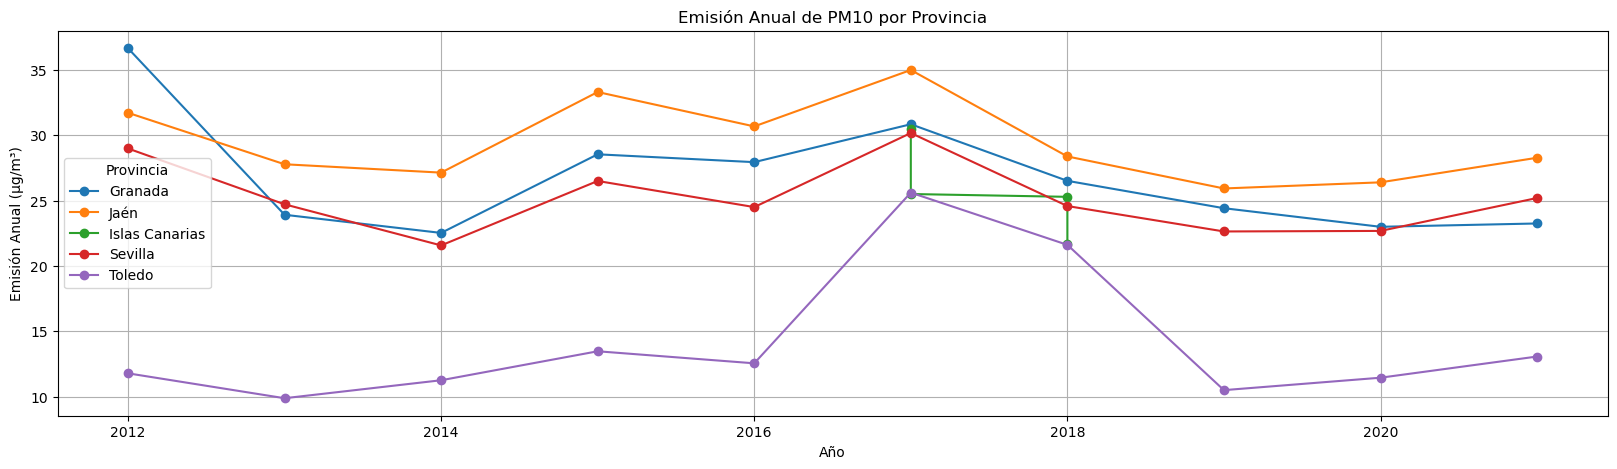

In [64]:
# Filtrar los datos para 'PM10' y las provincias específicas
provincias_interes_PM10 = ['Granada' , 'Jaén', 'Islas Canarias', 'Sevilla','Toledo']
datos_PM10 = df_calidad_aire[(df_calidad_aire['Emisión'] == 'PM10') & (df_calidad_aire['Provincia'].isin(provincias_interes_PM10))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_PM10:
    datos_provincia = datos_PM10[datos_PM10['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f'{provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de PM10 por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Altas concentraciones de Polvo , Polen y Hollin en Granada , Jaen, Las Palmas, Sevilla,Toledo

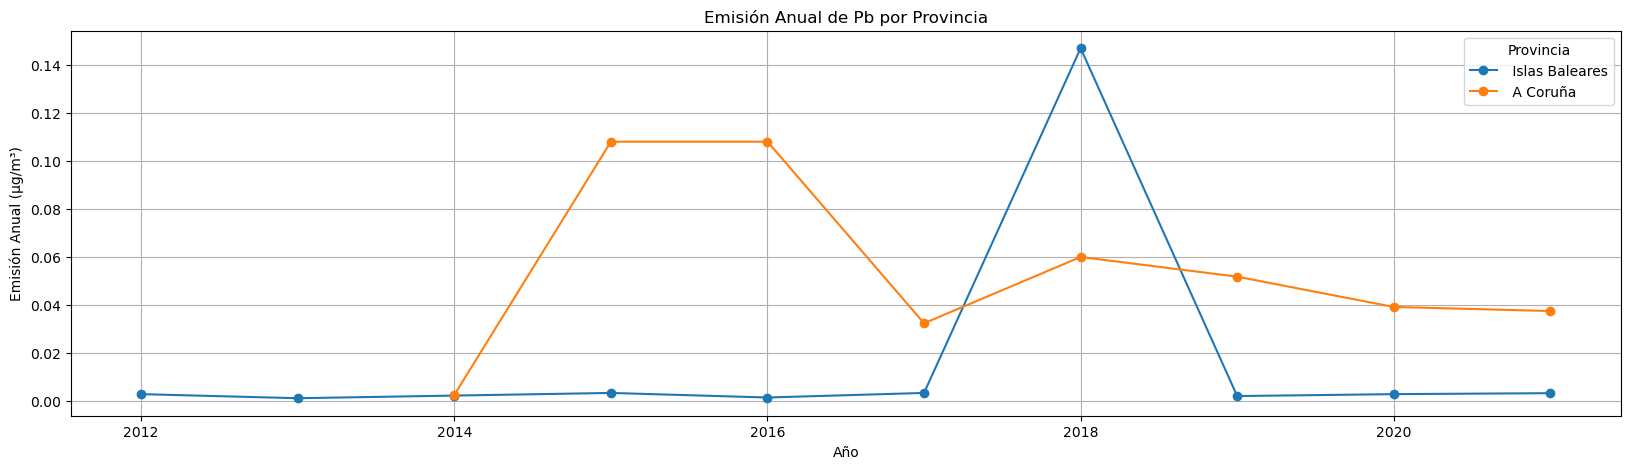

In [65]:
# Filtrar los datos para 'Pb' y las provincias específicas
provincias_interes_Pb = ['Islas Baleares', 'A Coruña']
datos_Pb = df_calidad_aire[(df_calidad_aire['Emisión'] == 'Pb') & (df_calidad_aire['Provincia'].isin(provincias_interes_Pb))]

# Crear el gráfico de líneas
plt.figure(figsize=(20,5))
for provincia in provincias_interes_Pb:
    datos_provincia = datos_Pb[datos_Pb['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Emisión Anual'], marker='o', label=f' {provincia}')

# Personalizar la gráfica
plt.title('Emisión Anual de Pb por Provincia')
plt.xlabel('Año')
plt.ylabel('Emisión Anual (µg/m³)')
plt.legend(title='Provincia')
plt.grid()
plt.show()

In [ ]:
# Altas concentraciones de Plomo en Baleares y Coruña

In [ ]:
# EXPLORATORIO

In [ ]:
correlation_matrix = data.corr().round(2)

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
filtro = (correlation_matrix["price"] < 0.2) & (correlation_matrix["price"] > -0.2)
relevantes = correlation_matrix.loc[filtro,:]
relevantes

In [ ]:
# EXCLUIR POCO SIGNIFICATIVAS 

In [ ]:
filtro_bueno = (correlation_matrix["price"] > 0.2) | (correlation_matrix["price"] < -0.2)
mas_relevantes = correlation_matrix.loc[filtro_bueno, :]
mas_relevantes

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(mas_relevantes, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
mas_relevantes.sort_values("price", ascending = False).iloc[1:4,0].index # 3 columnas más relevantes

In [ ]:
sns.scatterplot(x= data.sqft_living, y = data.price)
plt.show()

In [ ]:
sns.scatterplot(x= data.grade, y = data.price)
plt.show()

In [ ]:
sns.scatterplot(x= data.sqft_above, y = data.price)
plt.show()

In [ ]:
sns.scatterplot(x= data.sqft_above, y = data.sqft_living)
plt.show()

In [68]:
df_Censo.head(3)

Año Provincia  Provincia_ID     Sexo  Habitantes
0  2021  Albacete             2  Hombres      193487
1  2020  Albacete             2  Hombres      193913
2  2019  Albacete             2  Hombres      193806

In [69]:
df_calidad_aire.head(3)

Año Emisión  Emisión_ID Provincia  Provincia_ID  Emisión Anual
0  2012      As           1     Álava             1         0.3552
1  2012      As           1  Alicante             3         0.2681
2  2012      As           1   Almería             4         0.5523

In [73]:
df_hospi.head(3)

Año                                       Diagnóstico  Diagnóstico_ID  \
0  2012  Neoplasia maligna de tráquea, bronquios y pulmón               1   
1  2012  Neoplasia maligna de tráquea, bronquios y pulmón               1   
2  2012  Neoplasia maligna de tráquea, bronquios y pulmón               1   

  Provincia  Provincia_ID     Sexo  Hospitalizaciones  
0   Almería             4  Hombres               2615  
1   Almería             4  Mujeres                681  
2     Cádiz            11  Hombres               6505

In [72]:
df_censo.info()
df_calidad_aire.info()
df_hospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1040 non-null   int64 
 1   Provincia     1040 non-null   object
 2   Provincia_ID  1040 non-null   int64 
 3   Sexo          1040 non-null   object
 4   Habitantes    1040 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            2480 non-null   int64  
 1   Emisión        2480 non-null   object 
 2   Emisión_ID     2480 non-null   int64  
 3   Provincia      2480 non-null   object 
 4   Provincia_ID   2480 non-null   int64  
 5   Emisión Anual  2480 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 116.4+ KB
<class 'pandas.core.frame.D

In [5]:
df_final = (
    df_hospi
    .merge(df_calidad_aire, on=['Año', 'Provincia', 'Provincia_ID'], how='left')
    .merge(df_censo, on=['Año', 'Provincia', 'Provincia_ID', 'Sexo'], how='left')
)

In [8]:
df_final.dtypes

Año                    int64
Diagnóstico           object
Diagnóstico_ID         int64
Provincia             object
Provincia_ID           int64
Sexo                  object
Hospitalizaciones      int64
Emisión               object
Emisión_ID           float64
Emisión Anual        float64
Habitantes             int64
dtype: object

In [11]:
df_final['Emisión_ID'].isnull().sum()

1734

In [10]:
df_final['Emisión_ID'] = df_final['Emisión_ID'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer